In [1]:
import numpy as np
from mcts import MCTS
from tangram import Tangram
from mctstree import MCTSTree
%matplotlib inline

In [2]:
n_simuls=10
c = 1.0
gamma = 0.9

seed = 543
n_grid = 20
n_blocks = 4
n_possible_blocks = 6
chunk_type = 7
n_blocks_H = 2

In [3]:
mcts = MCTS()
env = Tangram(seed, n_grid, n_blocks, n_possible_blocks, chunk_type, n_blocks_H)

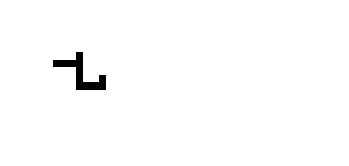

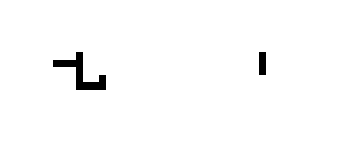

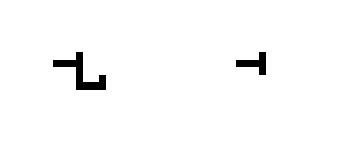

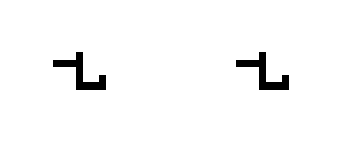

Reward: 1.0


In [20]:
env.reset()
tree = MCTSTree(env)
done = False
while not done:
    env.render()
    action = mcts.run_simulation(tree, n_simuls, c, gamma)
    block = action//(3*n_blocks)
    loc = action - block*3*n_blocks
    env_action = np.array([block,loc])
    env_state, env_reward, done = env.step(env_action)
    for (child_id, child) in tree.get_root().get_children():
        if child_id == action:
            child.set_reward(env_reward)
            child.set_done(done)
            child.set_action_mask(tree.get_env().get_mask())
            tree.set_root(child)
        else:
            child.delete()
env.render()
print("Reward: {}".format(env_reward))